In [ ]:
# !pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
# Dropout Regularization: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
# Numbers of classes - do not change unless the data changes
num_classes = 10

In [3]:
# size of batch and epochs of data
batch_size = 64
epochs = 24

In [4]:
# input image dimenssion
img_rows, img_cols = 28, 28

In [5]:
# the data, shuffled and split between train and test set
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(y_train)

60000

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [11]:
input_shape

(28, 28, 1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_train.dtype

dtype('uint8')

In [14]:
# Type convert and scale the test and training data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print(y_train[:3])

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
[9 0 0]


In [15]:
# Convert class vectors to binary matrices. One-hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1=> 0 1 0 0 0 0 0 0 0 0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2]) # verify one hot-encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## CNN Model

In [16]:
# Define the model
model = Sequential()

In [17]:
num_classes

10

In [18]:
# Create a CNN to clasify the images
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                 input_shape= input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(num_classes, activation= 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Define compile to minimize categorical loss, use some optimizer to optimize, and optimize to maximizing accuracy
model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

# Train the model and test/validate the model with the test data after each cycle (epoch) through the trainig data
hist = model.fit(X_train, y_train,
                 batch_size=64,
                 epochs=24,
                 verbose = 1,
                 validation_data= (X_test, y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.1181 - loss: 2.3131 - val_accuracy: 0.2093 - val_loss: 2.2641
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.2377 - loss: 2.2477 - val_accuracy: 0.3036 - val_loss: 2.2036
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.3307 - loss: 2.1876 - val_accuracy: 0.3929 - val_loss: 2.1406
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.4107 - loss: 2.1214 - val_accuracy: 0.4377 - val_loss: 2.0603
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.4442 - loss: 2.0346 - val_accuracy: 0.4525 - val_loss: 1.9591
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.4577 - loss: 1.9277 - val_accuracy: 0.4757 - val_loss: 1.8400
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 57ms/step - accuracy: 0.4856 - loss: 1.8042 - val_accuracy: 0.5130 - val_loss: 1.7072
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 66ms/step - accuracy: 0.5174 - loss: 1.6716 - 

In [20]:
hist.history

{'accuracy': [0.14153333008289337,
  0.2621999979019165,
  0.3515166640281677,
  0.4226333200931549,
  0.44681665301322937,
  0.4618000090122223,
  0.4916333258152008,
  0.5233333110809326,
  0.5442333221435547,
  0.5611166954040527,
  0.5810499787330627,
  0.6041499972343445,
  0.6205833554267883,
  0.6375166773796082,
  0.6513833403587341,
  0.6619333624839783,
  0.6699833273887634,
  0.6790833473205566,
  0.6861833333969116,
  0.6923333406448364,
  0.6982499957084656,
  0.7025166749954224,
  0.7065833210945129,
  0.7103666663169861],
 'loss': [2.2961788177490234,
  2.2329819202423096,
  2.1719024181365967,
  2.101654052734375,
  2.0092198848724365,
  1.8990919589996338,
  1.772047758102417,
  1.6371581554412842,
  1.5074131488800049,
  1.3923333883285522,
  1.295305848121643,
  1.2161954641342163,
  1.1521937847137451,
  1.100114107131958,
  1.0568674802780151,
  1.0202906131744385,
  0.9888756275177002,
  0.9619598388671875,
  0.9384088516235352,
  0.9174724817276001,
  0.898763000

Test loss:  0.8590554594993591
Test accuracy:  0.7020000219345093


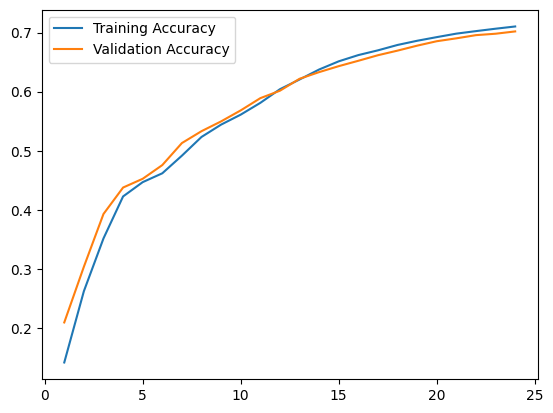

In [24]:
# Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(X_test, y_test, verbose= 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

# Plot data to see relationship in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy'])+1)) # values for x axis [1,2,3,......]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [27]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,160 (1.30 MB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 226,774 (885.84 KB)